# Classification - Multi Class Logistic Regression

1. Download the IRIS dataset from Kaggle

>> Source: https://www.kaggle.com/arshid/iris-flower-dataset

2. Upload the IRIS.csv to Colab

>> The dataset contains a set of 150 records under 4 features (Petal Length, Petal Width, Sepal Length, Sepal width) and one label(Species).

>>The idea is to classify data using features

## Load Data

In [ ]:
# # Uncomment to mount your google drive
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Let's rename columns

In [ ]:
data=data.rename(columns={'sepal_length':'X1', 'sepal_width':'X2', 'petal_length':'X3', 'petal_width':'X4',
       'species':'L'})

In [ ]:
data

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encode Labels (Change labels to numbers)

In [ ]:
#Lets first import the preprocessing module
from sklearn.preprocessing import LabelEncoder
#Now let's form a label Encoder model
le = LabelEncoder()
#Now we use feed the label column to the model
le.fit(data['L'])
#Model will go through column and find the unique labels (Number of classes that are there)
#Following line will print the labels found in the column
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
#Following line will convert the labels to an array of numbers
le.transform(data['L'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Lets replace these numbers with the labels in data
data['L']=le.transform(data['L'])

In [ ]:
data.head()

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


So now we are ready for classification! Labels are changed to 0, 1 and 2.

## Visualize Data

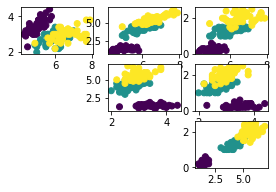

In [ ]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.subplot(4,4,2)
plt.scatter(data['X1'], data['X2'],c=data['L'])
plt.subplot(4,4,3)
plt.scatter(data['X1'], data['X3'],c=data['L'])
plt.subplot(4,4,4)
plt.scatter(data['X1'], data['X4'],c=data['L'])
plt.subplot(4,4,7)
plt.scatter(data['X2'], data['X3'],c=data['L'])
plt.subplot(4,4,8)
plt.scatter(data['X2'], data['X4'],c=data['L'])
plt.subplot(4,4,12)
plt.scatter(data['X3'], data['X4'],c=data['L'])

## Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop(columns='L'))
data_scaled = scaler.transform(data.drop(columns='L'))

In [ ]:
type(data_scaled)

numpy.ndarray

In [ ]:
data_scaled.shape

(150, 4)

## Split Data

Being consistant in the random selection from different classes!

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data_scaled, data['L'], test_size=0.3, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
#model = LogisticRegression(max_iter=1000)
model.fit(X_training,Y_training)
Y_testing_predicted=model.predict(X_testing)

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

## Result Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_testing,Y_testing_predicted))
print('f1_score: ', f1_score(Y_testing,Y_testing_predicted,average='weighted'))
print('Precision: ', precision_score(Y_testing,Y_testing_predicted,average='weighted'))
print('Recall: ', recall_score(Y_testing,Y_testing_predicted,average='weighted'))

LGC result:
Accuracy:  1.0
f1_score:  1.0
Precision:  1.0
Recall:  1.0


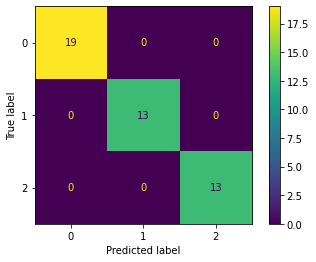

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_testing,Y_testing)